In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/Colab Data/BNC_BLX, 1W.csv'

Mounted at /content/drive


In [9]:
df = pd.read_csv(data_path)
print(df.shape)
df = df[['time', 'close']]
df = df[df['close'] > 0]
print(df.shape)

(569, 7)
(569, 2)


In [7]:
def func(x, p1, p2):
    return p1*np.log(x) + p2

In [8]:
ydata = np.log(df['close'])
ydata.head()

0   -2.455270
1   -2.985782
2   -2.795243
3   -2.798522
4   -2.728916
Name: close, dtype: float64

In [11]:
xdata = [x + 1 for x in range(0, len(df))]


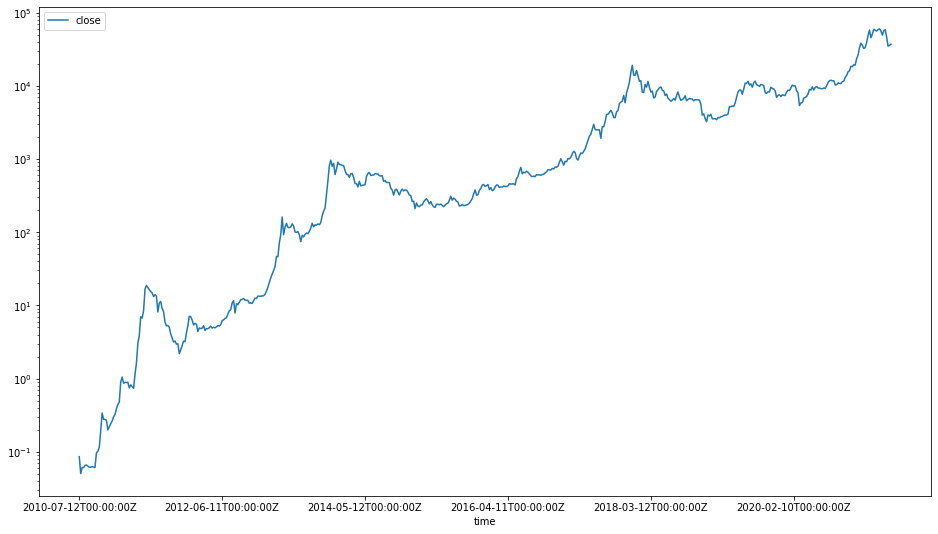

In [12]:
df.plot(x='time', y='close', logy=True, figsize=(16,9))

In [14]:
popt, pcov = curve_fit(func, xdata, ydata)

print(popt)
# [3.15949959, -10.98935028]
# y = p1 * log(x) + p2

[  3.15949959 -10.98935028]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


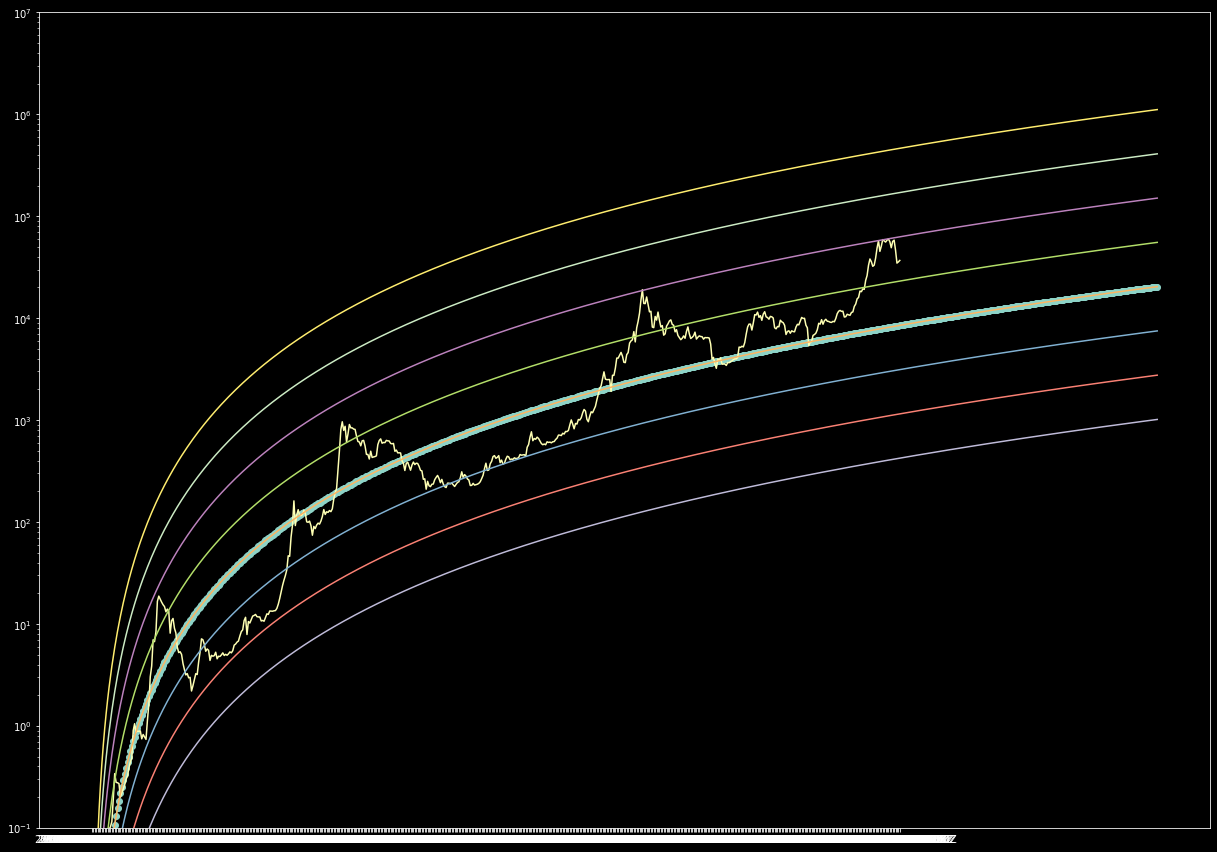

In [41]:
xdata = [x for x in range(0, 750)]

curvey = func(np.array(xdata), popt[0], popt[1])
plt.style.use('dark_background')

plt.figure(figsize=(21,15))
plt.plot(xdata, np.exp(curvey), scalex=True, scaley=True, marker='o')
plt.yscale('log')
plt.plot(df['time'], df['close'])
plt.ylim(bottom=0.1, top=10_000_000)
for i in range(-3, 5):
    plt.plot(xdata, np.exp(curvey + i))

In [40]:
df['time'].tail()

564    2021-05-03T00:00:00Z
565    2021-05-10T00:00:00Z
566    2021-05-17T00:00:00Z
567    2021-05-24T00:00:00Z
568    2021-05-31T00:00:00Z
Name: time, dtype: object